# Proyecto Final

Santos Contreras Karen Berenice<br>
Ochoa Fernández Francine

## Problema 1

Usando los datos del archivo problem1.csv (x_training, y_training)<br><br>
A. Encontrar el polinomio que mejor se ajusta a los datos de entrenamiento.<br>
B. Utilizando el criterio AIC, encontrar el mejor polinomio que se ajuste a los datos.<br>
C. Validar con cross validation el polinomio con el conjunto de datos problema1.csv (x_test, y_test).<br>

### A. Polinomio que mejor se ajusta a los datos de entrenamiento.

In [68]:
#Importando librerias necesarias
import numpy.polynomial.polynomial as poly 
from scipy import stats
import numpy as np
import pandas as pd 
import math
import matplotlib.pyplot as plt
from random import seed
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score

Importando información

In [69]:
data_p1= pd.read_csv('problem1.csv') #Importando data

In [70]:
#seleccionando los datos de entrenaiento
x_training=data_p1['X_training']
y_training=data_p1['Y_training']
#seleccionando los datos de prueba
x_test=data_p1['X_test'].dropna()
y_test=data_p1['Y_test'].dropna()

Graficando data de entrenamiento cruda 

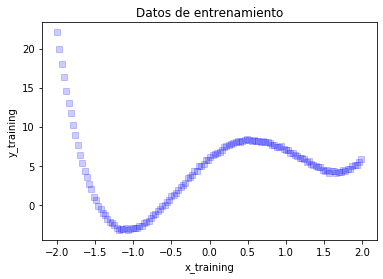

In [71]:
ax = plt.plot(x_training,y_training,'bs',alpha=0.2,)
plt.xlabel('x_training')
plt.ylabel('y_training')
plt.title('Datos de entrenamiento')
plt.show()

Se calculan los coeficientes de nuestro polinomio del grado asumido.

In [72]:
coef_8 = poly.polyfit(x_training, y_training, 8,rcond=None,w=None) # Asumiendo un grado polinomial de 8

Se muestra el modelo polinomial creando con los coeficientes calculados anteriormente.

In [73]:
model_8 = poly.Polynomial(coef_8)
model_8

Polynomial([ 6.00793895e+00,  8.03796810e+00, -6.06320867e+00, -3.02503500e+00,
        2.09500406e+00,  8.00105182e-03, -4.29431659e-02, -1.12113794e-03,
        5.73512923e-03], domain=[-1,  1], window=[-1,  1])

Graficando Polinomio de datos de entrenamiendo (x_training, y_training) en rosa y en azul el polinomio modelado para valores de x_training.

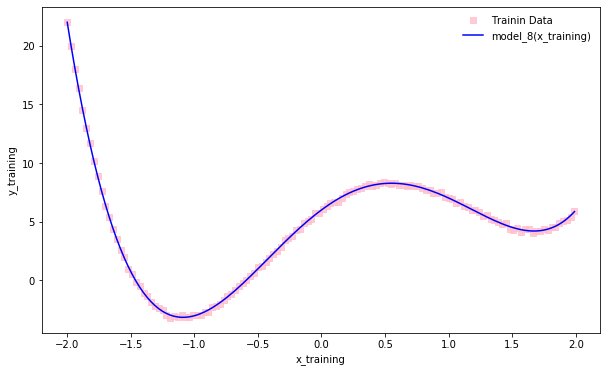

In [74]:
plt.figure(figsize=(10,6))
plt.plot(x_training, y_training,'bs',color='pink',alpha=0.8, label='Trainin Data')
plt.plot(x_training, model_8(x_training),'blue', label='model_8(x_training)')
plt.legend(loc='best', frameon=False)
plt.xlabel('x_training')
plt.ylabel('y_training')
plt.show()

Mean Squared Error entre los datos y_training y la predicción con el modelo de grado 8 de los datos dados x_training:

In [75]:
MSE = mean_squared_error(y_test, model_8(x_test))
print('MSE=',MSE*100,'%')

MSE= 2268.6127670869378 %


Graficando Polinomio de datos de prueba (x_test, y_test) en rosa y en azul el polinomio modelado para valores de x_test.

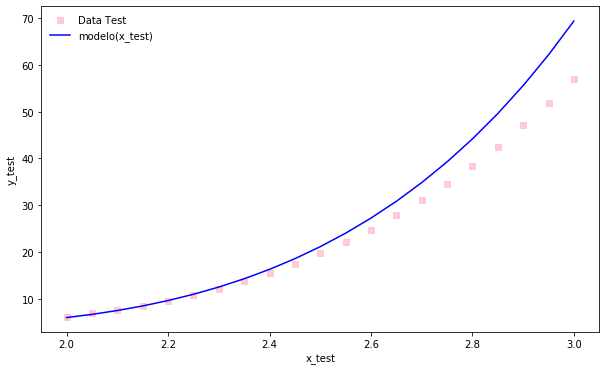

In [76]:
plt.figure(figsize=(10,6))
plt.plot(x_test, y_test,'bs',color='pink',alpha=0.8, label='Data Test')
plt.plot(x_test, model_8(x_test),'blue', label='modelo(x_test)')
plt.legend(loc='best', frameon=False)
plt.xlabel('x_test')
plt.ylabel('y_test')
plt.show()

Como notamos que hay mucho error, decidimos bajar el grado del poninomio a 6.

In [77]:
coef_6= poly.polyfit(x_training, y_training, 6,rcond=None,w=None) # Asumiendo un grado polinomial de 6
model_6 = poly.Polynomial(coef_6)
model_6

Polynomial([ 5.99963281e+00,  8.03146028e+00, -5.98917994e+00, -3.01088971e+00,
        1.99420887e+00,  4.90861018e-04,  3.05914004e-04], domain=[-1,  1], window=[-1,  1])

Graficando Polinomio de datos de entrenamiendo (x_training, y_training) en naranja y el polinomio modelado para valores de x_training en verde.

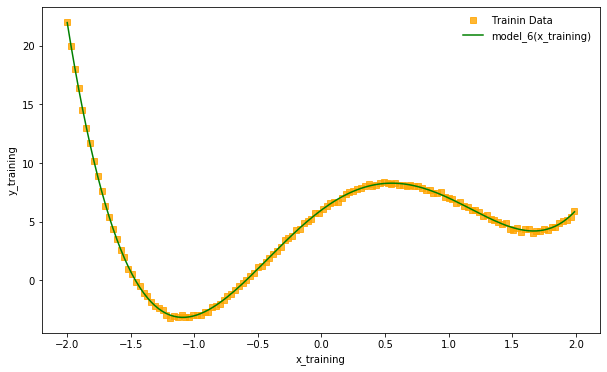

In [78]:
plt.figure(figsize=(10,6))
plt.plot(x_training, y_training,'bs',color='orange',alpha=0.8, label='Trainin Data')
plt.plot(x_training, model_6(x_training),'green', label='model_6(x_training)')
plt.legend(loc='best', frameon=False)
plt.xlabel('x_training')
plt.ylabel('y_training')
plt.show()

In [79]:
MSE = mean_squared_error(y_test, model_6(x_test))
print('MSE=',MSE*100,'%')

MSE= 2.5081794725828925 %


Podemos notar que el error disminuye significativamente. Grafiquemos el polinomio de datos de prueba (x_test, y_test) en naranja y en verde el polinomio modelado para valores de x_test.

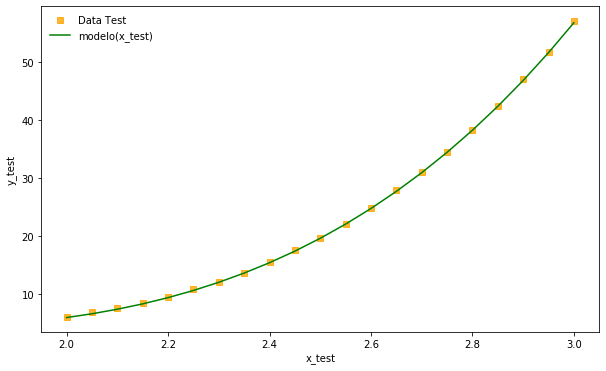

In [80]:
plt.figure(figsize=(10,6))
plt.plot(x_test, y_test,'bs',color='orange',alpha=0.8, label='Data Test')
plt.plot(x_test, model_6(x_test),'green', label='modelo(x_test)')
plt.legend(loc='best', frameon=False)
plt.xlabel('x_test')
plt.ylabel('y_test')
plt.show()

### B. Con AIC, encontrando el mejor polinomio.

Akaike’s Information Criterion<br>
El AIC calcula cuánta información se perdería si se utilizaran las predicciones del modelo en lugar de los datos reales. Calculamos el AIC para cada modelo y elegimos el modelo con el AIC más bajo. El AIC sólo nos indica las cualidades relativas, no las absolutas: no sabremos que tan bueno que es nuestro modelo independientemente de los demás.
El AIC busca un buen equilibrio entre el sobreajuste y el infraajuste teniendo en cuenta la complejidad del modelo y la información perdida. 

In [81]:
Pol_Max = 15
#Creando arreglos con una cantidad Pol_Max-1 de ceros eb cada uno.
RSSv = [] 
RSSv = np.zeros(Pol_Max-1)
AICv = []
AICv = np.zeros(Pol_Max-1)

In [82]:
for i in np.arange(0,Pol_Max-1,1):
        coef = poly.polyfit(x_training, y_training, i+1)
        model = poly.Polynomial(coef)
        RSSv[i]=0.5*np.sum((y_training-model(x_training))**2)
        AICv[i]=len(x_training)*math.log10(RSSv[i]/len(x_training))+ 2*len(coef)*len(x_training)/(len(x_training)-len(coef)-1)

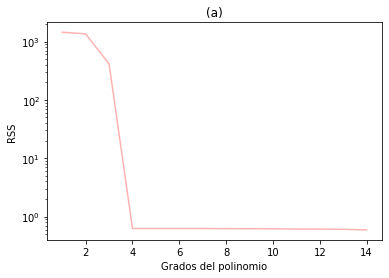

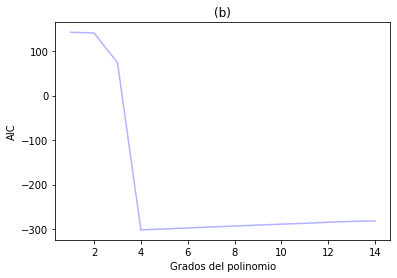

In [83]:
#Gráfica a:
plt.plot(np.arange(0,Pol_Max-1,1)+1, RSSv,'r',alpha=0.3)
plt.yscale('log')
plt.xlabel('Grados del polinomio')
plt.ylabel('RSS')
plt.title('(a)')
plt.show()

#Gráfica b:
plt.plot(np.arange(0,Pol_Max-1,1)+1, AICv,'b',alpha=0.3)
plt.xlabel('Grados del polinomio')
plt.ylabel('AIC')
plt.title('(b)')
plt.show()

Por lo que se puede ver en las gráficas anteriores. El grado de polinomio que más se ajusta a nuestros datos, segun el criterio AIC, es:

In [84]:
grado_AIC = np.argmin(AICv)+1
grado_AIC

4

Entonces, el polinomio queda como sigue

In [85]:
coef_AIC=poly.polyfit(x_training, y_training, grado_AIC)

In [86]:
modelo_AIC = poly.Polynomial(coef_AIC)
modelo_AIC

Polynomial([ 6.0000592 ,  8.02956741, -5.99141415, -3.00869471,  1.99588109], domain=[-1,  1], window=[-1,  1])

Graficando Polinomio de datos de entrenamiendo (x_training, y_training) en rojo y en verde el polinomio modelado para valores de x_training.

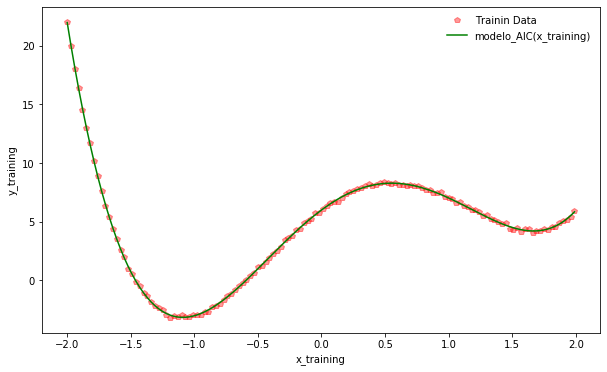

In [87]:
plt.figure(figsize=(10,6))
plt.plot(x_training, y_training,'p',color='red',alpha=0.4, label='Trainin Data')
plt.plot(x_training, modelo_AIC(x_training),'green', label='modelo_AIC(x_training)')
plt.legend(loc='best', frameon=False)
plt.xlabel('x_training')
plt.ylabel('y_training')
plt.show()

Mean Squared Error entre los datos y_test y la predicción con el modelo de grado 4 de los datos dados x_test:

In [88]:
MSE = mean_squared_error(y_test, modelo_AIC(x_test))
print('MSE=',MSE*100,'%')

MSE= 4.925190113746648 %


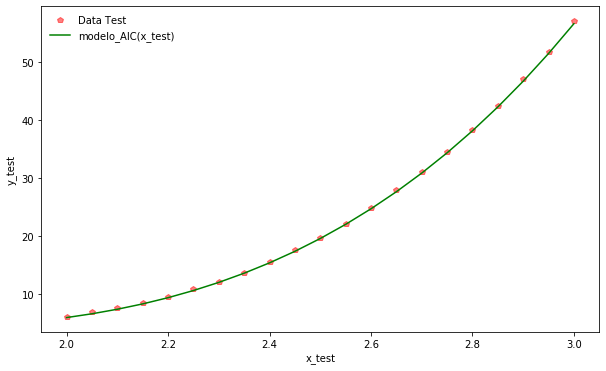

In [89]:
plt.figure(figsize=(10,6))
plt.plot(x_test, y_test,'p',color='red',alpha=0.5, label='Data Test')
plt.plot(x_test, modelo_AIC(x_test),'green', label='modelo_AIC(x_test)')
plt.legend(loc='best', frameon=False)
plt.xlabel('x_test')
plt.ylabel('y_test')
plt.show()

### C. Cross Validation

In [90]:
for inidice_entrenamiento in [1,2,3,4,5,6,8,9,10]:
    coefic=poly.polyfit(x_training, y_training, inidice_entrenamiento)
    modelo=poly.Polynomial(coefic)
    MSE = mean_squared_error(y_test, modelo(x_test))
    r_2=r2_score(y_test, modelo(x_test))
    print('Para un polinomio de grado',inidice_entrenamiento,'se tiene un','MSE=',MSE*100,'%',
          'y el coeficiente de determinacion es',r_2,'al comparar lo modelado con los datos de prueba.\n')

Para un polinomio de grado 1 se tiene un MSE= 55026.82681261973 % y el coeficiente de determinacion es -1.3058695697404055 al comparar lo modelado con los datos de prueba.

Para un polinomio de grado 2 se tiene un MSE= 35955.2816837384 % y el coeficiente de determinacion es -0.506686732787633 al comparar lo modelado con los datos de prueba.

Para un polinomio de grado 3 se tiene un MSE= 282879.9023134351 % y el coeficiente de determinacion es -10.853930099529112 al comparar lo modelado con los datos de prueba.

Para un polinomio de grado 4 se tiene un MSE= 4.925190113746648 % y el coeficiente de determinacion es 0.9997936125583409 al comparar lo modelado con los datos de prueba.

Para un polinomio de grado 5 se tiene un MSE= 3.8181268532104817 % y el coeficiente de determinacion es 0.999840003448605 al comparar lo modelado con los datos de prueba.

Para un polinomio de grado 6 se tiene un MSE= 2.5081794725828925 % y el coeficiente de determinacion es 0.9998948960887574 al comparar lo m

La mejor puntuación posible del coeficiente de determinacion es 1 y puede ser negativa (ya que el modelo puede ser arbitrariamente peor).

## Problema 2

De un ensayo clínico, tenemos 12 pacientes con infección por VIH. Después del tratamiento, la enfermedad progresó en 6 pacientes (1) y en 6 pacientes la infección no progresó (0). Se realizan cuatro mediciones en los 12 pacientes (edad, niveles de azúcar, niveles de células T y colesterol). <br>
¿Qué medida puede utilizarse como marcador para describir la progresión de la enfermedad? <br>
¿Cuál será el criterio para predecir la progresión? Los datos se encuentran en "problema2.csv (x_edad, x_azúcar, x_células T, x_colesterol, resultado). <br>
Ordena los datos y explica brevemente tus resultados. La variable "y" (objetivo) es un vector de 0 y 1 para representar la progresión.



Para ese problema se hará uso de la  clasificación. El objetivo de la clasificación es tomar un vector de entrada 'x' y asignarlo a una de las $K$ clases discretas $C_k$, donde $k = 1, . . . , K$. <br>
El espacio de entrada se divide así en regiones de decisión cuyos límites se denominan fronteras de decisión o superficies de decisión.

El modelo de clasificación que se usará es la regresión logística, que es un algoritmo de clasificación de aprendizaje automático que se utiliza para predecir la probabilidad de una variable dependiente categórica. En la regresión logística, la variable dependiente es una variable binaria que contiene datos codificados como 1 (sí, éxito, etc.) o 0 (no, fracaso, etc.).

Con la matriz de confusión: Matriz de errores para evaluar el rendimiento de un algoritmo.<br>
Cada fila de la matriz representa las instancias de una clase predicha, mientras que cada columna representa las instancias de una clase real.<br>
Conceptos importantes:<br>
El error de tipo I es el rechazo incorrecto de una hipótesis nula verdadera (un "falso positivo") <br>
El error de tipo II es la retención incorrecta de una hipótesis nula falsa (un "falso negativo")<br>

Se hara uso de la curva ROC. La curva ROC es una curva de características operativas del receptor, es un gráfico que ilustra la capacidad de diagnóstico de un sistema clasificador binario al variar su umbral de discriminación.

El área bajo la curva ROC (AUC) es una métrica agregada que evalúa lo bien que un modelo de regresión logística, clasifica los resultados positivos y negativos en todos los puntos de corte posibles. Puede oscilar entre 0.5 y 1, y cuanto mayor sea, mejor.

In [91]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

data_p2= pd.read_csv('problem2.csv') #Importando data

x_age = ((data_p2.x_age.astype(float)).values).reshape(-1, 1)  
x_cholesterol = ((data_p2.x_cholesterol.astype(float)).values).reshape(-1, 1)  
x_sugar =( (data_p2.x_sugar.astype(float)).values).reshape(-1, 1)  
x_Tcell = ((data_p2.x_Tcell.astype(float)).values).reshape(-1, 1)  
y=((data_p2.y.astype(int)).values)

### Logistic Model Classification

In [92]:
model1 = LogisticRegression(C=1.0, solver='lbfgs', multi_class='ovr')#lbfgs sirve para problemas multiclase
#model = LogisticRegression(solver='liblinear', random_state=0)#liblinear sirve para problemas con pocos datos

### Edad

#### Separando datos de la edad

In [93]:
x_train, x_test, y_train, y_test = train_test_split(x_age, y, test_size=0.2, random_state=5)

In [94]:
#Entrenando modelo con datos de edad
model1.fit(x_train, y_train)
model1.score(x_train, y_train)

0.5555555555555556

#### Visualizacion de datos y la predicción con variable edad

Text(0, 0.5, 'y')

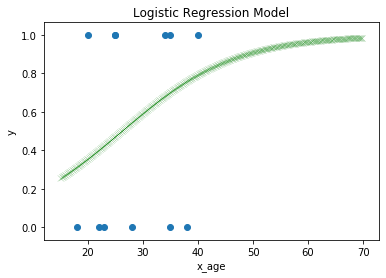

In [95]:
X = np.arange(15, 70, 0.1)
X = X.reshape(-1, 1)
plt.scatter(x_age, y)
plt.scatter(X,model1.predict_proba(X)[:,1],marker='x',color='g',linewidth=.1)
plt.title("Logistic Regression Model")
plt.xlabel('x_age')
plt.ylabel('y')

In [96]:
print(model1.intercept_,model1.coef_)

[-2.51910956] [[0.09660073]]


##### Marker para la variable edad con matriz de confusión

In [97]:
cm_age= confusion_matrix(y, model1.predict(x_age))

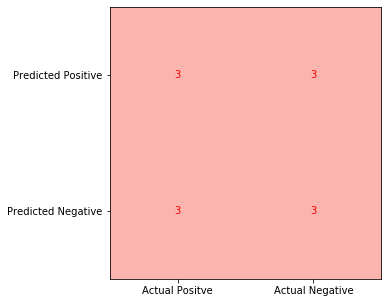

In [98]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.imshow(cm_age,cmap=plt.cm.Pastel1)
ax.grid(False)
ax.yaxis.set(ticks=(0, 1), ticklabels=('Predicted Positive', 'Predicted Negative'))
ax.xaxis.set(ticks=(0, 1), ticklabels=('Actual Positve', 'Actual Negative'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm_age[i, j], ha='center', va='center', color='red')
plt.show()

#### ROC Curve

In [99]:
#Genera una Diagonal(Random)
ns_probs = [0 for _ in range(len(y))]

In [100]:
# Aqui se predicen las probabilidades
lr_probs = model1.predict_proba(x_age)
# se mantienen las probabilidades sólo para el resultado positivo
lr_probs = lr_probs[:, 1]
# scores
ns_auc = roc_auc_score(y, ns_probs)
lr_auc = roc_auc_score(y, lr_probs)

In [101]:
print('ROC AUC for Logistic Model =%.3f' % (lr_auc))

ROC AUC for Logistic Model =0.597


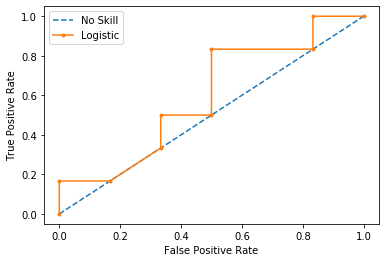

In [102]:
# Calcula curvas roc 
ns_fpr, ns_tpr, _ = roc_curve(y, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y, lr_probs)
# Curva roc para el modelo
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

### Colesterol

#### Separando datos de el colesterol

In [103]:
x_train, x_test, y_train, y_test = train_test_split(x_cholesterol, y, test_size=0.3, random_state=5)

In [104]:
#Entrenando modelo con datos de colesterol
model1.fit(x_train, y_train)
model1.score(x_train, y_train)

0.625

#### Visualizacion de datos y la predicción con variable Visualizacion de datos y la predicción con variable colesterol

Text(0, 0.5, 'y')

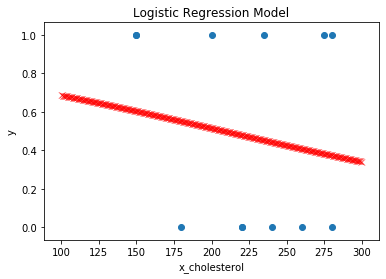

In [105]:
X = np.arange(100, 300, 0.1)
X = X.reshape(-1, 1)
plt.scatter(x_cholesterol, y)
plt.scatter(X,model1.predict_proba(X)[:,1],marker='x',color='r',linewidth=.1)
plt.title("Logistic Regression Model")
plt.xlabel('x_cholesterol')
plt.ylabel('y')

In [106]:
print(model1.intercept_,model1.coef_)

[1.50771544] [[-0.00722093]]


##### Marker para la variable colesterol  con matriz de confusión

In [107]:
cm_col= confusion_matrix(y, model1.predict(x_cholesterol))

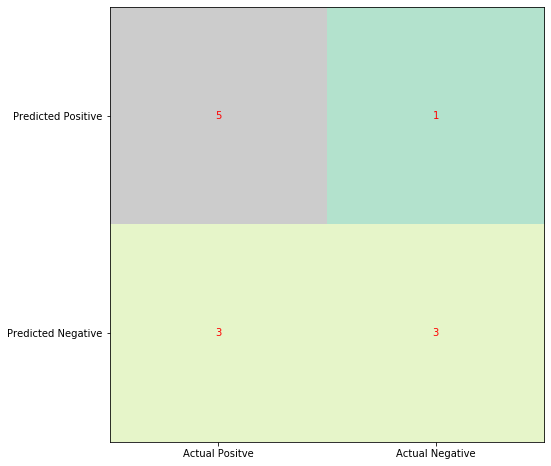

In [108]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm_col,cmap=plt.cm.Pastel2)
ax.grid(False)
ax.yaxis.set(ticks=(0, 1), ticklabels=('Predicted Positive', 'Predicted Negative'))
ax.xaxis.set(ticks=(0, 1), ticklabels=('Actual Positve', 'Actual Negative'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm_col[i, j], ha='center', va='center', color='red')
plt.show()

#### ROC Curve

In [109]:
#Genera una Diagonal(Random)
ns_probs = [0 for _ in range(len(y))]

In [110]:
# Aqui se predicen las probabilidades
lr_probs = model1.predict_proba(x_cholesterol)
# se mantienen las probabilidades sólo para el resultado positivo
lr_probs = lr_probs[:, 1]
# scores
ns_auc = roc_auc_score(y, ns_probs)
lr_auc = roc_auc_score(y, lr_probs)

In [111]:
# summarize scores
print('ROC AUC for Logistic Model =%.3f' % (lr_auc))

ROC AUC for Logistic Model =0.597


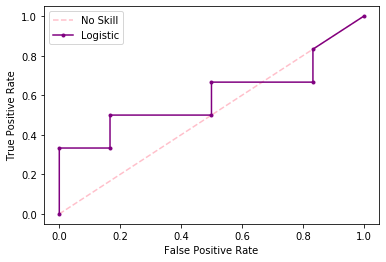

In [112]:
# Calcula curvas roc 
ns_fpr, ns_tpr, _ = roc_curve(y, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y, lr_probs)
# Curva roc para el modelo
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill',color="pink")
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic',color="purple")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

### Niveles de azucar

#### Separando datos de los niveles de azucar

In [113]:
x_train, x_test, y_train, y_test = train_test_split(x_sugar, y, test_size=0.3, random_state=5)

In [114]:
#Entrenando modelo con datos de niveles de azucar
model1.fit(x_train, y_train)
model1.score(x_train, y_train)

1.0

#### Visualizacion de datos y la predicción con variable Visualizacion de datos y la predicción con variable de los niveles de azucar

Text(0, 0.5, 'y')

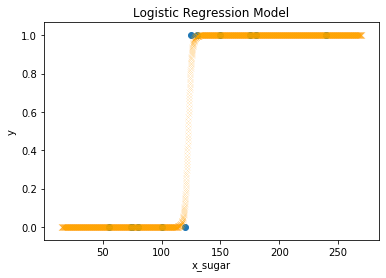

In [115]:
X = np.arange(15, 270, 0.1)
X = X.reshape(-1, 1)
plt.scatter(x_sugar, y)
plt.scatter(X,model1.predict_proba(X)[:,1],marker='x',color='orange',linewidth=.1)
plt.title("Logistic Regression Model")
plt.xlabel('x_sugar')
plt.ylabel('y')

In [116]:
print(model1.intercept_,model1.coef_)

[-87.67981786] [[0.7157536]]


##### Marker para la variable de niveles de azucar  con matriz de confusión

In [117]:
cm= confusion_matrix(y, model1.predict(x_sugar))

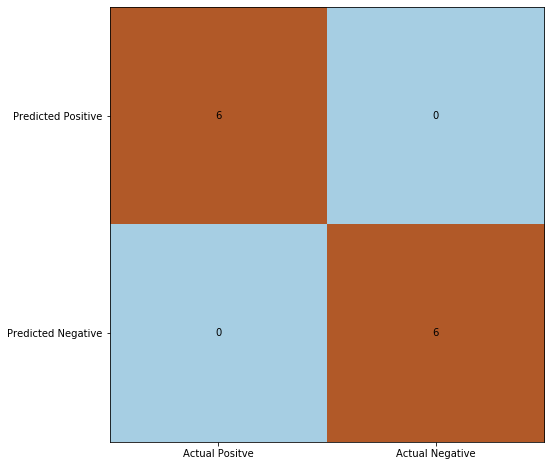

In [118]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm,cmap=plt.cm.Paired)
ax.grid(False)
ax.yaxis.set(ticks=(0, 1), ticklabels=('Predicted Positive', 'Predicted Negative'))
ax.xaxis.set(ticks=(0, 1), ticklabels=('Actual Positve', 'Actual Negative'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='black')
plt.show()

#### ROC Curve

In [119]:
#Genera una Diagonal(Random)
ns_probs = [0 for _ in range(len(y))]

In [120]:
# Aqui se predicen las probabilidades
lr_probs = model1.predict_proba(x_sugar)
# se mantienen las probabilidades sólo para el resultado positivo
lr_probs = lr_probs[:, 1]
# scores
ns_auc = roc_auc_score(y, ns_probs)
lr_auc = roc_auc_score(y, lr_probs)

In [121]:
print('ROC AUC for Logistic Model =%.3f' % (lr_auc))

ROC AUC for Logistic Model =1.000


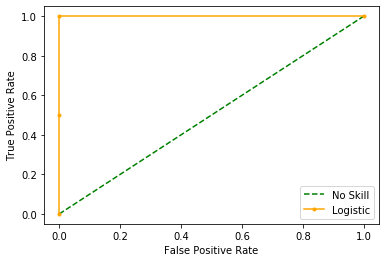

In [122]:
# Calcula curvas roc 
ns_fpr, ns_tpr, _ = roc_curve(y, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y, lr_probs)
# Curva roc para el modelo
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill',color="green")
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic',color="orange")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

###  Niveles de células T

#### Separando datos de los niveles de células T

In [123]:
x_train, x_test, y_train, y_test = train_test_split(x_Tcell, y, test_size=0.3, random_state=5)

In [124]:
#Entrenando modelo con datos de celulas T
model1.fit(x_train, y_train)
model1.score(x_train, y_train)

1.0

#### Visualizacion de datos y la predicción con variable Visualizacion de datos y la predicción con variable de los niveles de células T

Text(0, 0.5, 'y')

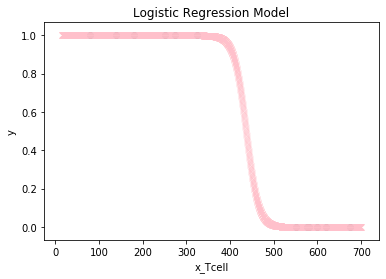

In [125]:
X = np.arange(15, 700, 0.1)
X = X.reshape(-1, 1)
plt.scatter(x_Tcell, y)
plt.scatter(X,model1.predict_proba(X)[:,1],marker='x',color='pink',linewidth=.1)
plt.title("Logistic Regression Model")
plt.xlabel('x_Tcell')
plt.ylabel('y')

In [126]:
print(model1.intercept_,model1.coef_)

[31.70077079] [[-0.07262875]]


##### Marker para la variable de niveles de celulas T con matriz de confusión

In [127]:
cm_cell= confusion_matrix(y, model1.predict(x_Tcell))

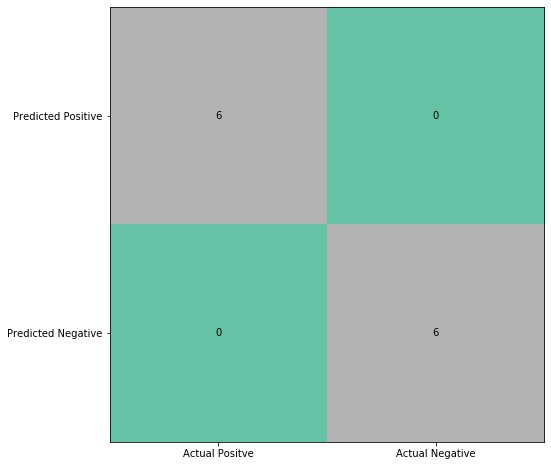

In [128]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm_cell,cmap=plt.cm.Set2)
ax.grid(False)
ax.yaxis.set(ticks=(0, 1), ticklabels=('Predicted Positive', 'Predicted Negative'))
ax.xaxis.set(ticks=(0, 1), ticklabels=('Actual Positve', 'Actual Negative'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm_cell[i, j], ha='center', va='center', color='black')
plt.show()

#### ROC Curve

In [129]:
#Genera una Diagonal(Random)
ns_probs = [0 for _ in range(len(y))]

In [130]:
# Aqui se predicen las probabilidades
lr_probs = model1.predict_proba(x_Tcell)
# se mantienen las probabilidades sólo para el resultado positivo
lr_probs = lr_probs[:, 1]
# scores
ns_auc = roc_auc_score(y, ns_probs)
lr_auc = roc_auc_score(y, lr_probs)

In [131]:
# summarize scores
print('ROC AUC for Logistic Model =%.3f' % (lr_auc))

ROC AUC for Logistic Model =1.000


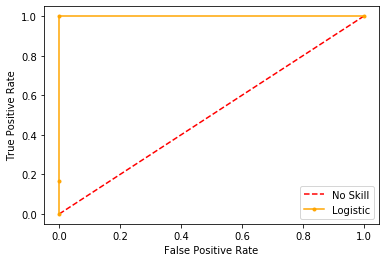

In [132]:
# Calcula curvas roc 
ns_fpr, ns_tpr, _ = roc_curve(y, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y, lr_probs)
# Curva roc para el modelo
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill',color="red")
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic',color="orange")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

### ¿Qué medida puede utilizarse como marcador para describir la progresión de la enfermedad?

Dado el análisis anterior, se puede ver que en las variables que nos indican los niveles de azucar y las cantidades de celulas T se tienen resultados similares.<br>
Para ambas variables se tiene una precisión en el modelo de 1.0. <br>
En la matriz de confusión podemos ver que de los valores reales positivos, se predijeron los 6 como positivos y de los valores reales negativos, se predijeron como negativos los 6.<br>
También, se cuenta con el área bajo la curva ROC (AUC), que tiene un valor de 1.0, lo que indica que el modelo de regresión logística clasifica los resultados positivos y negativos en todos los puntos de corte posibles de manera muy buena.

### ¿Cuál será el criterio para predecir la progresión?

Observando las predicciones y gráficas de la regresión logistica para las variables que nos indican los niveles de azucar y las cantidades de celulas T, podemos decir que cualquiera de estas dos variables hace una predicción lo suficientemente buena.

## Problema 3

El estudiante puede encontrar cualquier conjunto de datos en línea y tratar de aplicar cualquiera de las herramientas que aprendemos en el
curso.

Una red neuronal básica consta de una capa de entrada, que son sólo sus datos, en forma numérica. Después de la capa de entrada, hay un número de capas denominadas "ocultas". Una capa oculta se encuentra entre las capas de entrada y de salida. Una capa oculta significa que sólo se tiene una red neuronal. Si hay dos o más capas ocultas, ya se tiene una red neuronal profunda.<br>
Si se tienen muchas capas ocultas, la red neuronal puede empezar a aprender relaciones no lineales entre sus capas de entrada y salida.

In [133]:
import tensorflow as tf
import tensorflow.keras as keras

In [134]:
#Data set de numeros escritos a mano
mnist = tf.keras.datasets.mnist
#Separando en train y test
(x_train, y_train),(x_test, y_test) = mnist.load_data()

Los datos de x_train son los "features." En este caso son  imagenes de 28x28 pixeles con digitos escritos a mano que van del 0 al 9. Los datos de y_train son la etiqueta, o sea, el numero que indica la imagen, nuevamente van del 0 al 9.

Mostrando como se ven los datos que usaremos

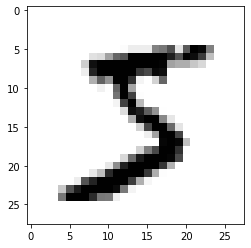

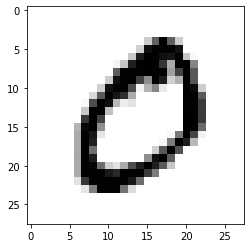

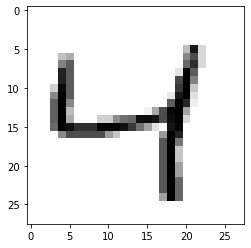

In [135]:
plt.imshow(x_train[0],cmap=plt.cm.binary)
plt.show()
plt.imshow(x_train[1],cmap=plt.cm.binary)
plt.show()
plt.imshow(x_train[2],cmap=plt.cm.binary)
plt.show()

Las redes neuronales son muy buenas para ajustarse a los datos, por lo que hay que tener cuidado de no sobreajustar los datos. La red neuronal no debe sólo memorizar los datos si no que el objetivo es que generalice el problema.

Normalizando datos

In [136]:
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

In [137]:
#Modelo secuencial,
model = tf.keras.models.Sequential()
#Las imagenes de entrada deran de 28x28, por lo que se tiene que hacer plana (1x784). 
#se usará la capa de aplanado de keras 
model.add(tf.keras.layers.Flatten())

Las capas densas se refieren al hecho de que es una capa que está totalmente conectada, donde cada nodo se conecta a cada nodo anterior y posterior. <br>
Las primeras dos capas tienen 128 unidades y la función de activación es relu, que significa  lineal rectificada. <br>
La última capa tiene 10 unidades. Es 1 nodo por cada posible número de predicción. Aquí, la función de activación es la función softmax, ya que se busca una distribución de probabilidad.

In [138]:
#Capas ocultas
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu,input_shape=[1]))#128 neuronas
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu,input_shape=[1]))#128 neuronas
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax,input_shape=[1]))#capa de salida

In [139]:
model.compile(optimizer='adam',#Optimizador adam,ajustará pesos y sesgos de manera eficiente.
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [140]:
model.fit(x_train, y_train, epochs=3) #entrenando

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Train on 60000 samples
Epoch 1/3
60000/60000 [==============================] - 18s 293us/sample - loss: 0.2655 - acc: 0.9227
Epoch 2/3
60000/60000 [==============================] - 15s 242us/sample - loss: 0.1076 - acc: 0.9663
Epoch 3/3
60000/60000 [==============================] - 14s 237us/sample - loss: 0.0730 - acc: 0.9775


Se puede ver que la pérdida disminuye y la precisión aumenta. Lo anterior fue para los datos de entrenamiento. Una precisión alta y  pérdida baja puede significar que el modelo ha aprendido a clasificar dígitos en general o que ha memorizado todos los ejemplos. Por lo que se probará con los datos de prueba.

In [141]:
val_loss, val_acc = model.evaluate(x_test, y_test)
print('Perdida:',val_loss)
print('Precisión',val_acc)

10000/10000 [==============================] - 1s 83us/sample - loss: 0.0980 - acc: 0.9709
Perdida: 0.09798201267765835
Precisión 0.9709


In [142]:
model.save('num_reader.model')
model_hand_written_numbers = tf.keras.models.load_model('num_reader.model')
#Prediciendo
predictions = model_hand_written_numbers.predict(x_test)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


#### Predicciones

Dada un numero escrito a mano:


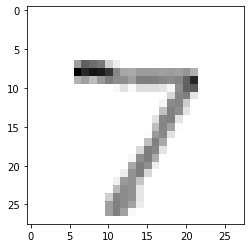

In [143]:
print('Dada un numero escrito a mano:')
plt.imshow(x_test[0],cmap=plt.cm.binary)

In [144]:
print('La red neuronal predice que es un:',np.argmax(predictions[0]))

La red neuronal predice que es un: 7


Dada un numero escrito a mano:


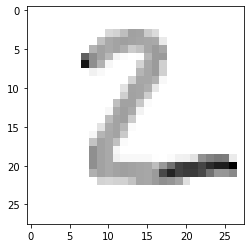

In [145]:
print('Dada un numero escrito a mano:')
plt.imshow(x_test[1],cmap=plt.cm.binary)

In [146]:
print('La red neuronal predice que es un:',np.argmax(predictions[1]))

La red neuronal predice que es un: 2


Dada un numero escrito a mano:


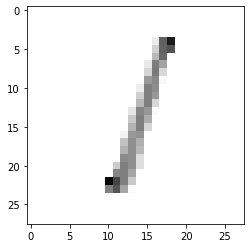

In [147]:
print('Dada un numero escrito a mano:')
plt.imshow(x_test[2],cmap=plt.cm.binary)

In [148]:
print('La red neuronal predice que es un:',np.argmax(predictions[3]))

La red neuronal predice que es un: 0


Dada un numero escrito a mano:


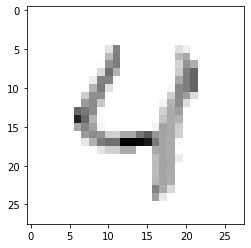

In [149]:
print('Dada un numero escrito a mano:')
plt.imshow(x_test[4],cmap=plt.cm.binary)

In [150]:
print('La red neuronal predice que es un:',np.argmax(predictions[4]))

La red neuronal predice que es un: 4
